In [15]:
!pip install japanize-matplotlib

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

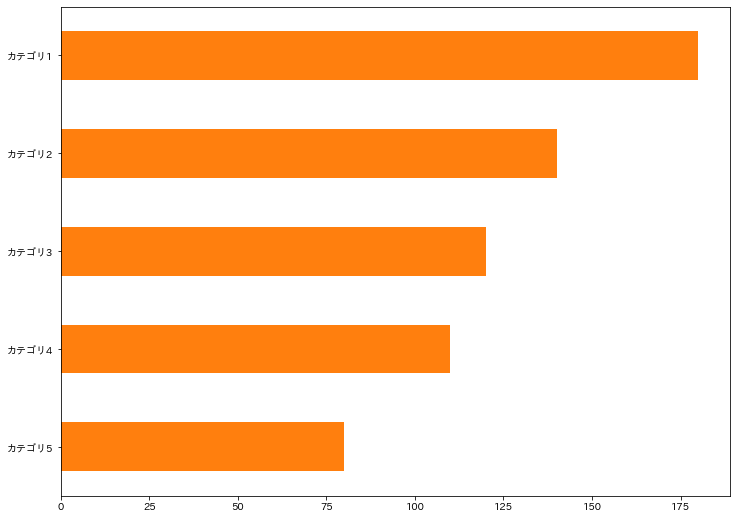

In [10]:
# 適当な横棒グラフaをpandas.plot.barh()で作成
label = ['カテゴリ1','カテゴリ2',
         'カテゴリ3','カテゴリ4',
         'カテゴリ5']
data = [180,140,120,110,80]
df = pd.DataFrame(data, index=label)
fig, ax = plt.subplots(figsize=(12,9))
df.iloc[::-1].plot.barh(ax=ax, 
                        color='C1', 
                        legend=False)

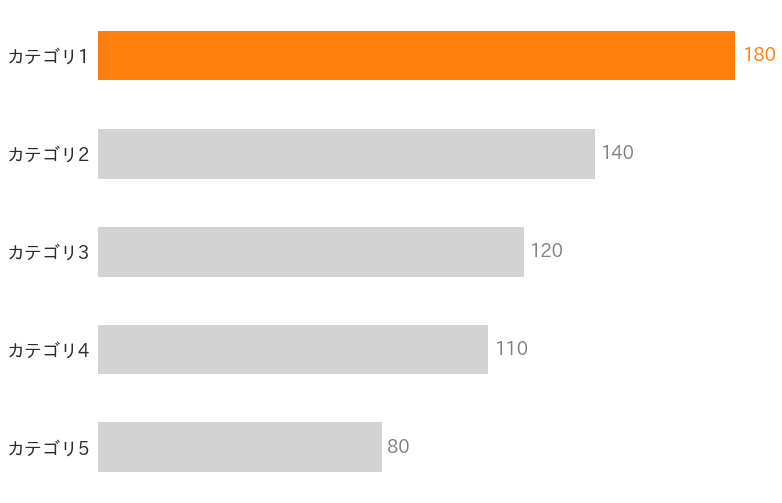

In [11]:
# 適当な横棒グラフをpandas.plot.barh()で作成
label = ['カテゴリ1','カテゴリ2','カテゴリ3','カテゴリ4','カテゴリ5']
data = [180,140,120,110,80]
df = pd.DataFrame(data, index=label)
fig, ax = plt.subplots(figsize=(12,9))
df.iloc[::-1].plot.barh(ax=ax, color='C1', legend=False)

# x軸は薄く小さく
ax.tick_params(axis='x', labelsize=14, colors='dimgray')
# y軸は見やすい大きさで黒よりは薄く
ax.tick_params(axis='y', labelsize=18, colors='#2b2b2b')

# 枠（spines）は消す位置を指定して削除
rm_posi = ['top', 'left', 'right']
[ax.spines[posi].set_visible(False)  for posi in rm_posi]
# 軸目盛りはカテゴリ名には必要ない
ax.tick_params(left=False)

# 四角形の要素はax.patchesで取得
[patch.set_color('lightgray') for patch in ax.patches[:-1]]

# データの値だけループで棒横にテキスト追加
vmax = max(data) # データの最大値
for i, val in enumerate(reversed(data)):
    c = 'C1' if val == vmax else 'gray'
    ax.text(val+vmax*0.01,i,f'{val:,}',color=c,size=18,va='center')
# x軸は消す
ax.tick_params(bottom=False, labelbottom=False)
ax.spines['bottom'].set_visible(False)

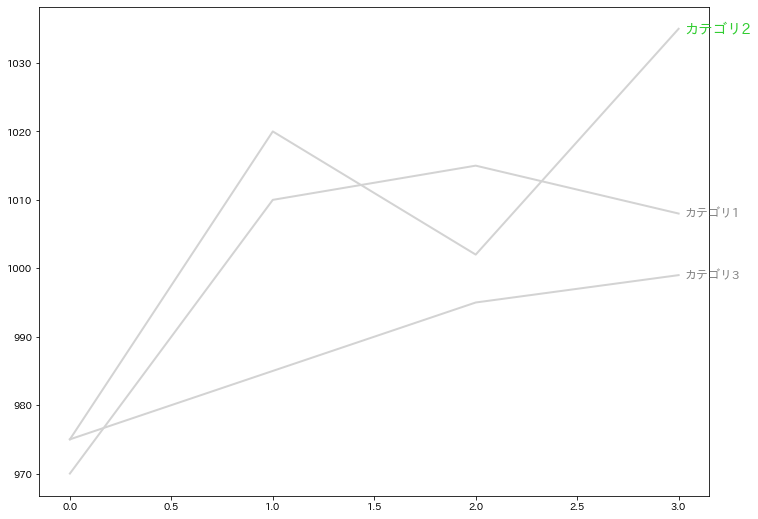

In [12]:
df = pd.DataFrame([[970, 1010, 1015, 1008],
                    [975, 1020, 1002, 1035],
                    [975, 985, 995, 999]]
                    ,index=['カテゴリ1', 'カテゴリ2', 'カテゴリ3']
                    ,columns=[0,1,2,3])
fig, ax = plt.subplots(figsize=(12, 9))
# 凡例を消す
df.T.plot(ax=ax, linewidth=2, legend=False, color='lightgray')
# 通常の凡例の代わりにプロットの右側にindexを表示
for i, name in enumerate(df.index.values):
   c,s = ('limegreen','x-large') if name == 'カテゴリ2' else ('gray', 'large') 
   ax.text(df.columns.values.max()+0.03, ax.lines[i].get_data()[1][-1], name,
           color=c, fontsize=s, va='center')

# 細かい見た目の部分は省略します。

AttributeError: 'DataFrame' object has no attribute 'rain'

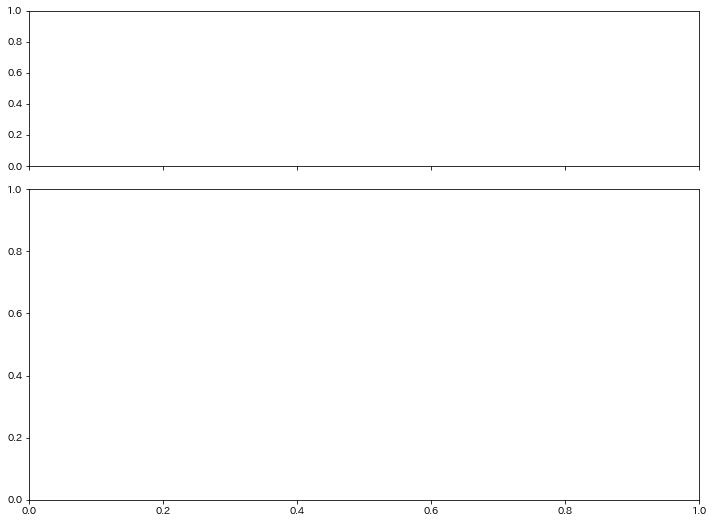

In [13]:
# 2行のaxisにしてx軸は共通にする
kw = dict(height_ratios=[1,2], hspace=0.1)
fig, (ax, ax1) =\
    plt.subplots(nrows=2, 
                 figsize=(12, 9), 
                 sharex='all',
                 gridspec_kw=kw)

ax1.bar(df.index, df.rain, color='C2')
ax.plot(df.index, df.temp,
        color='C2', linewidth=3)
ax.scatter(df.index, df.temp, color='C2')
# 細かいレイアウト設定は省略

In [14]:
# 代替案1への追記分
# レコードごとにデータラベルをつける
for i, row in df.iterrows():
 if i == 1:
   ax.text(i, row.temp+6.0, '平均気温（℃）',  
           color='dimgray', size=16, 
           ha='center')
   ax1.text(i, row.rain+50.0, '降水量（mm）', 
            color='dimgray', size=16, 
            ha='center')
 ax.text(i, row.temp+1.8, f'{row.temp}', 
         color='C2', size=14, ha='center')
 ax1.text(i, row.rain+8, f'{row.rain}', 
          color='C2', size=14, ha='center')



AttributeError: 'Series' object has no attribute 'temp'